# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate

In [2]:
# import data 
transacts_df = pd.read_csv("../data/bank_transactions.csv")
transacts_df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# rename coloumn for consistency
transacts_df =  transacts_df.rename(columns={'oldbalanceOrg' : 'oldbalanceOrig'})
transacts_df.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


## Univariate analysis

In [3]:
# counts and percentage function for despcriptive stats, resuse, and simplicity
def show_class_distribution(df, target_col, label="Dataset"):
    """
    Prints the class distribution (counts and percentages) for any target column.

    Args:
        df (pd.DataFrame): DataFrame to analyze
        target_col (str): Column name to analyze (e.g., 'isFraud', 'isFlaggedFraud')
        label (str): Custom label for clarity
    """
    if target_col not in df.columns:
        print(f"🚫 ERROR: '{target_col}' not found in DataFrame columns.")
        print("📦 Available columns:", df.columns.tolist())
        return

    print(f"\n💹 Class distribution in {label} → (column: '{target_col}'):")
    counts = df[target_col].value_counts()
    percentages = df[target_col].value_counts(normalize=True) * 100
    dist_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.round(3)
    })
    print(dist_df)


In [8]:
# use of predefined funciton show_class_distribution()
show_class_distribution(transacts_df, target_col='isFraud', label="Original Dataset")

# isolate fraudulent transaction in full dataset 
transacts_df[transacts_df['isFraud'] == 1] 


💹 Class distribution in Original Dataset → (column: 'isFraud'):
          Count  Percentage (%)
isFraud                        
0        998703           99.87
1          1297            0.13


,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
439,CASH_OUT,530354.58,C1119661582,530354.58,0.0,C1171953426,4728783.51,5259138.09,1,0
982,TRANSFER,5429153.98,C2027207246,5429153.98,0.0,C1388180627,0.00,0.00,1,0
1084,CASH_OUT,834592.40,C851101642,834592.40,0.0,C1583598303,236428.35,1071020.75,1,0
1903,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00,1,0
1912,TRANSFER,296699.39,C1746633930,296699.39,0.0,C1032143722,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
997527,TRANSFER,2571605.04,C991826252,2571605.04,0.0,C2045424554,0.00,0.00,1,0
997654,CASH_OUT,1421665.98,C467140343,1421665.98,0.0,C1583441435,0.00,1421665.98,1,0
998488,TRANSFER,349627.64,C246515037,349627.64,0.0,C1455585247,0.00,0.00,1,0
998998,CASH_OUT,1749325.14,C1029257629,1749325.14,0.0,C1200877577,1327198.86,3076524.00,1,0


In [10]:
# TODO: view the shape of your data
# DIsplay information about data structures, Shape, etc.
transacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrig  1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [11]:

show_class_distribution(transacts_df, target_col='isFlaggedFraud', label="Original Dataset")

# isolate the one fraudulent transaction in full dataset 
transacts_df[transacts_df['isFlaggedFraud'] == 1] 


💹 Class distribution in Original Dataset → (column: 'isFlaggedFraud'):
                 Count  Percentage (%)
isFlaggedFraud                        
0               999999           100.0
1                    1             0.0


,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
564103,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1


### Observations:
- The sigular fraudulently indentified tranansaction 
- I immediately noticed the 0.0 amounts in oldbalanceOrig and newbalanceOrig.
- This this amount looks to be a result from a deposit and withdrawal of a large amount
- This is the typical behavior of fraudulent transactions

Notes:
- I think if I find the changes between transactions/predictors for feature engineering testing
   

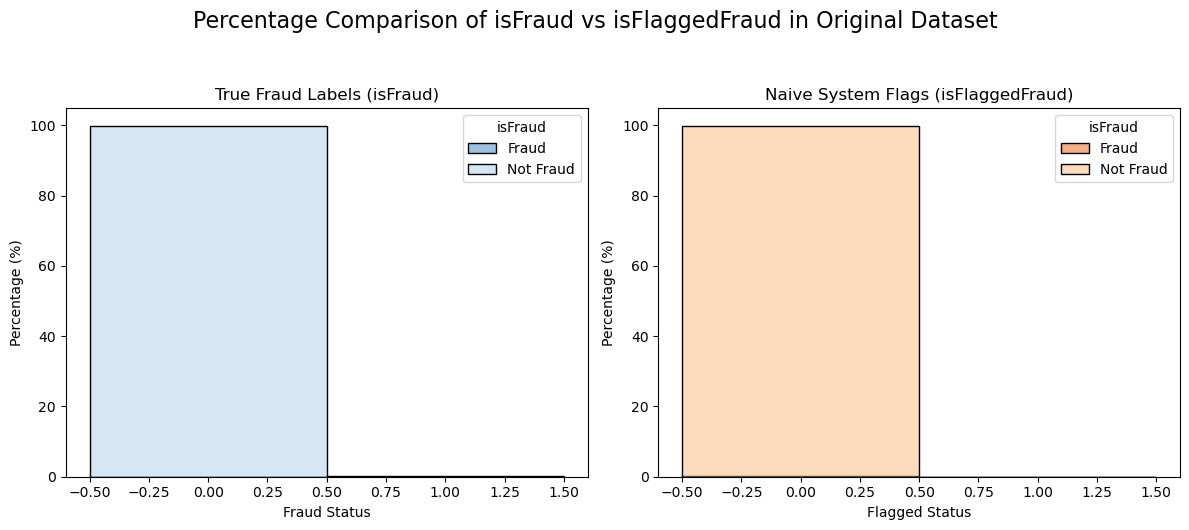

In [12]:
# bar graphs of isFruad and isFlaggedFraud from full dataset
plt.figure(figsize=(12, 5))

# Plot isFraud (percentages)
plt.subplot(1, 2, 1)
sns.histplot(x='isFraud', data=transacts_df, discrete=True, stat="percent", hue='isFraud', palette='Blues')
plt.title('True Fraud Labels (isFraud)')
plt.xlabel('Fraud Status')
plt.ylabel('Percentage (%)')
plt.legend(title='isFraud', labels=['Fraud', 'Not Fraud'])


# Plot isFlaggedFraud (percentages)
plt.subplot(1, 2, 2)
sns.histplot(x='isFlaggedFraud', data=transacts_df, discrete=True, stat="percent", hue='isFraud', palette='Oranges')
plt.title('Naive System Flags (isFlaggedFraud)')
plt.xlabel('Flagged Status')
plt.ylabel('Percentage (%)')
plt.legend(title='isFraud', labels=['Fraud', 'Not Fraud'])

plt.suptitle('Percentage Comparison of isFraud vs isFlaggedFraud in Original Dataset', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


## Q&A Based on Feature-Metric Findings

### What does this feature actually mean?  
- **`IsFlaggedFraud`**: A “naive” model that simply flags a transaction as fraudulent if the `Amount > 200,000` (note: this currency is not USD).  
- ✅ It’s a **rule-based system**—hard-coded logic with no learning or adaptation.  
- ✅ **isFraud**: The *true simulated fraud label*. A transaction is considered fraudulent if it represents a malicious attempt to transfer funds out of a victim’s account **before the account owner could secure their information**. This is the target variable for training machine learning models.

---

### Why was it there?  
- 📦 This was the bank’s **legacy fraud detection system**—a quick fix meant to catch only *large* transactions.  
- 💪 My company was brought in because this method is **clearly inadequate** for modern fraud patterns.  

---

### How does it behave in reality?  
- 📊 According to EDA output:  
  - Out of 1,000,000 transactions, **only 1** was flagged as fraudulent by this system.  
  - ⚠️ It missed **1,296 actual fraud cases** that were **under the 200,000 threshold**.  
  - 🚨 This shows **near-zero recall**—the system is blind to smaller but still damaging fraud.  

---

### 📝Takeaway  
The legacy system’s naive approach is **insufficient** for modern fraud detection.  
✔️ Our ML pipeline will replace it with a smarter, adaptive model that can detect fraud **across all transaction amounts and types**, not just big-ticket transfers.


In [13]:
# create sample of original dataset
# Sampling 20% from each class while preserving ratio
df_sample = transacts_df.groupby('isFraud', group_keys=False).apply(
    lambda x: x.sample(frac=0.2, random_state=42)
)
# Check class balance
show_class_distribution(df_sample, target_col='isFraud', label="Sampled Dataset")


💹 Class distribution in Sampled Dataset → (column: 'isFraud'):
          Count  Percentage (%)
isFraud                        
0        199741           99.87
1           259            0.13


C:\Users\oneps\AppData\Local\Temp\ipykernel_28344\1870079020.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = transacts_df.groupby('isFraud', group_keys=False).apply(


In [14]:
# TODO: Begin your EDA
df_sample.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.0
mean,1.792976e+05,8.389851e+05,8.600408e+05,1.096150e+06,1.220014e+06,0.001295,0.0
std,5.908282e+05,2.906965e+06,2.942506e+06,3.201035e+06,3.447636e+06,0.035963,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.344060e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.488763e+04,1.395250e+04,0.000000e+00,1.343043e+05,2.179373e+05,0.000000,0.0
75%,2.085786e+05,1.072462e+05,1.445388e+05,9.447359e+05,1.117137e+06,0.000000,0.0
max,6.096528e+07,3.471830e+07,3.477257e+07,3.114049e+08,3.114929e+08,1.000000,0.0


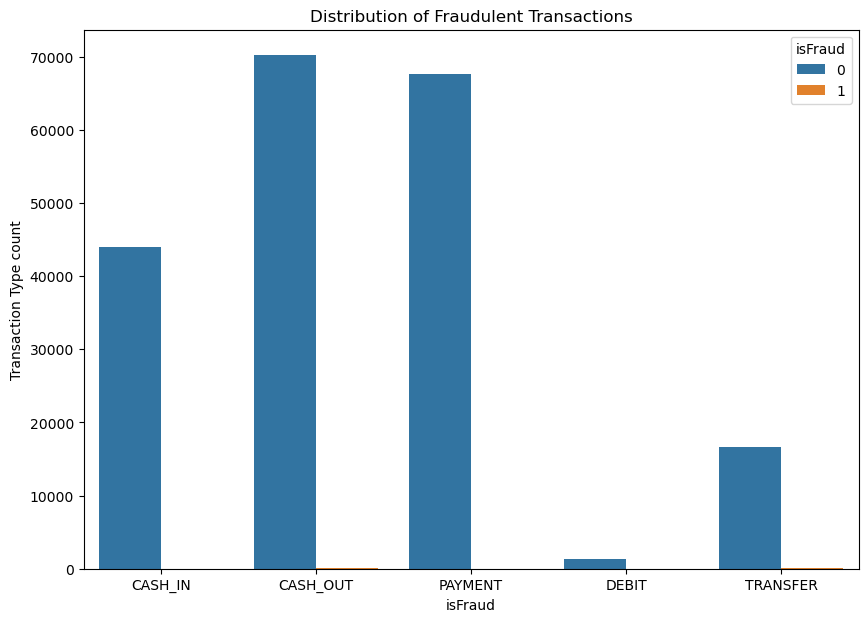

In [15]:
# countplot of 'Type' column
plt.figure(figsize=(10, 7))
sns.countplot(data=df_sample, x='type', hue='isFraud')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Transaction Type count')
plt.show()

## Initial Observations:
- Both CASH_IN AND PAYMENT shows very few Fraud cases, with blue bars dominating.
- Both CASH_OUT and TRANSFER shows some Fraud present with visible tiny orange bars.
  - These categories may be useful in feature engineering 
  - Possbile candidates for predictors?

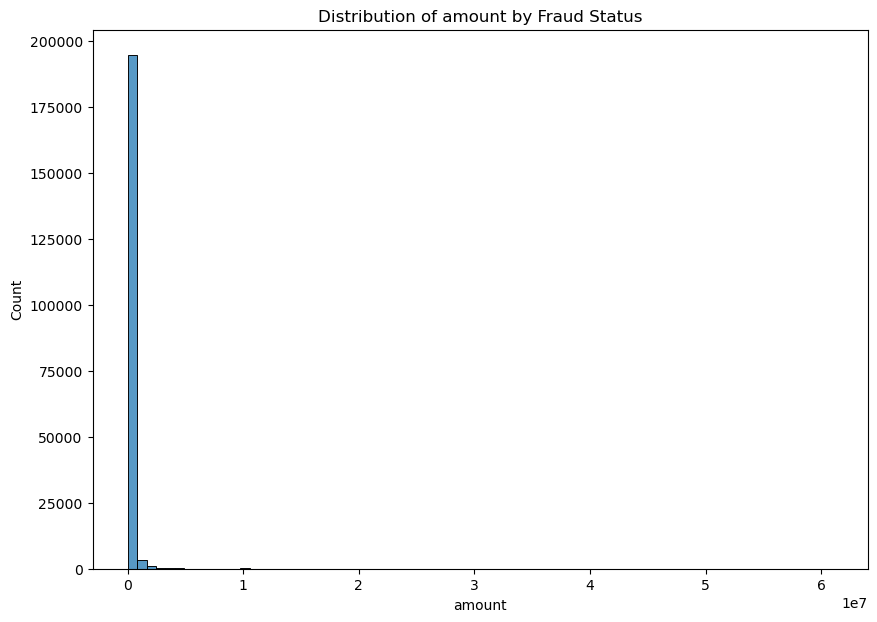

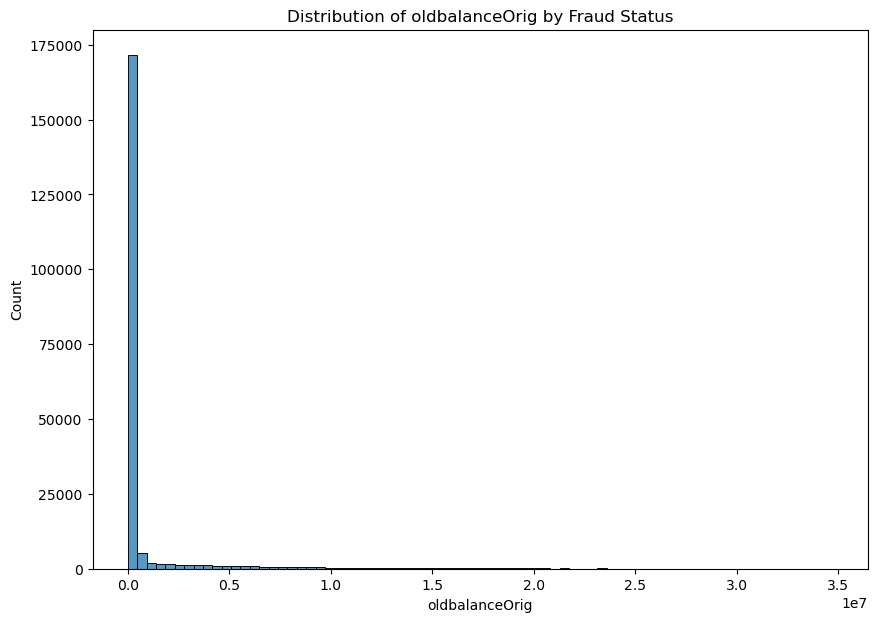

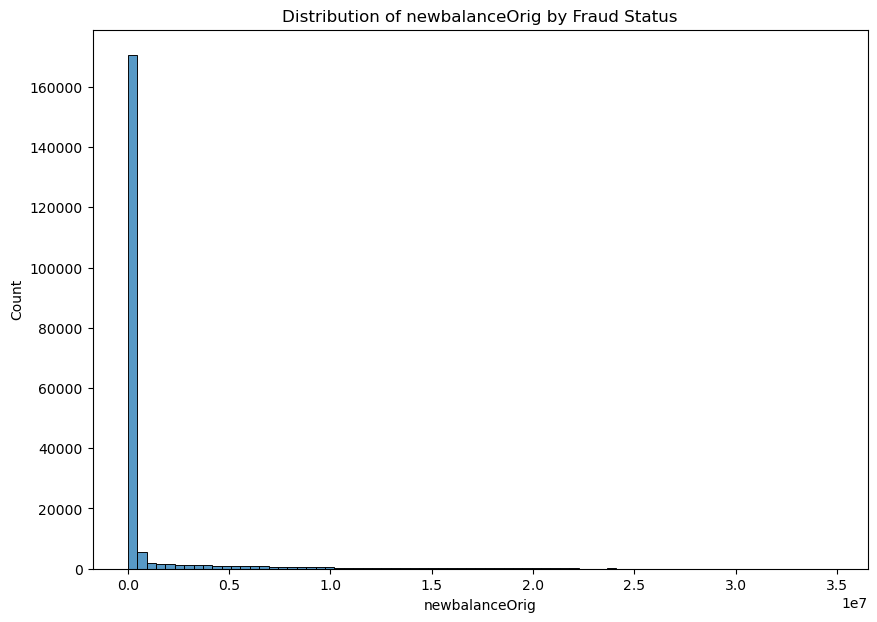

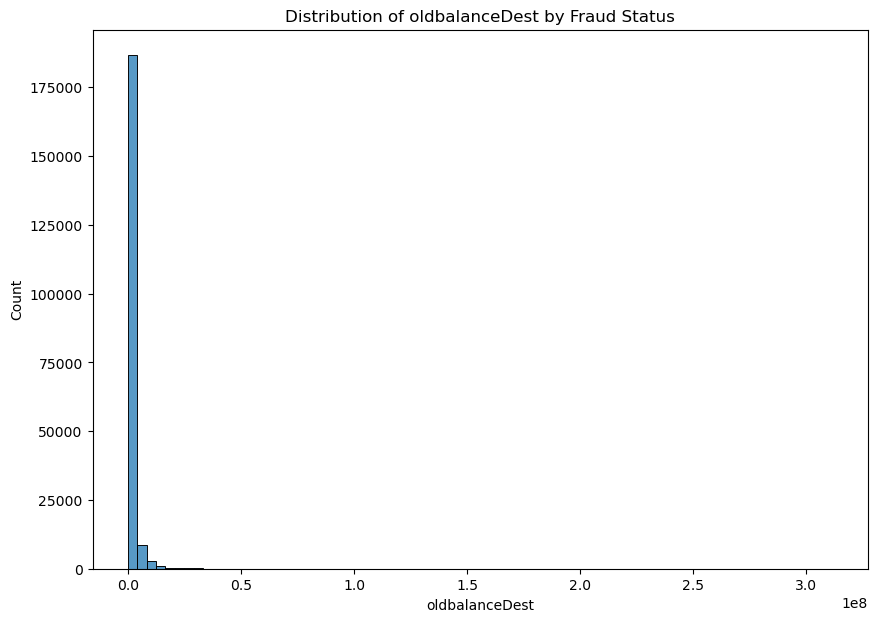

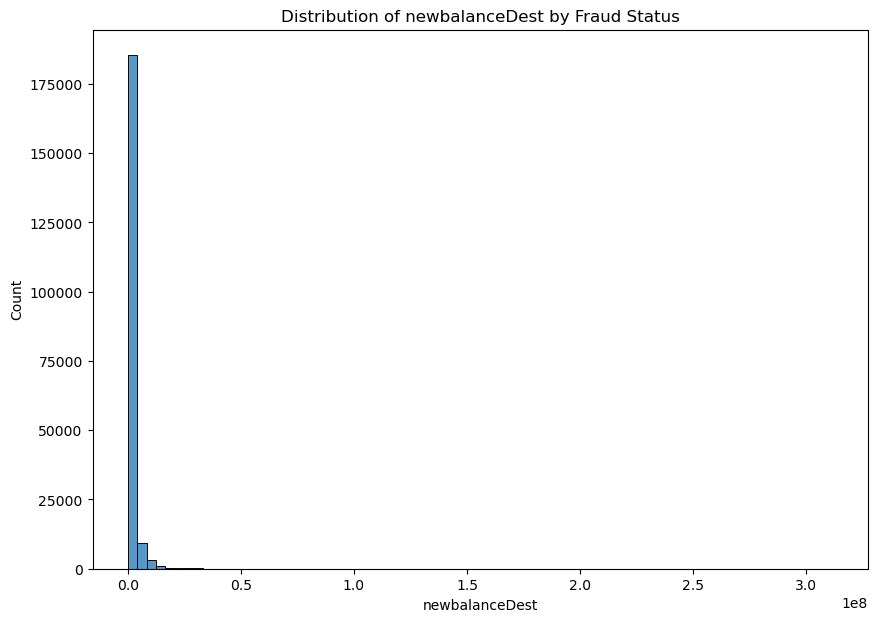

In [16]:
# 1, histograms of the following: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest
for col in ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    plt.figure(figsize=(10, 7))
    sns.histplot(data=df_sample, x=col, bins=75)
    plt.title(f"Distribution of {col} by Fraud Status")
    plt.xlabel(f"{col}")
    plt.show()



## Observations of Feature Distribution using Numeric columns and Histogram Plots
**According to the Histogram Plots:**

- Most transactions involve small amounts 
- This show small balance changes (low-amount purchases, payments, and general day-to-day transactions)
-  amount seem to be concentrated between 0 - 1
- These appear heavily concentrated between 0 - 0.5 for oldbalanceDest and newbalannceDest
- oldbalanceOrig and newbalanceOrig appear be concentrated between 0 - 2.5

**Rare/possbile fraudulent transactions Transactions:**
- These transactions/amounts involve pretty large outliers
- This cause dramatic balance shifts
- These are likely to include fraudulent activities

**Notes:**
- The data has heavy-tailed distributions (many small values, few extreme ones).
- Fraud may often be associated with these rare large transactions.
- Models need transformation (log scaling) or feature engineering to handle this skewness properly.

In [57]:
# 3, Group by 'type' and calcualte descriptive stats for 'amount'
type_amount_stats = df_sample.groupby('type')['amount'].describe().round(2)
type_amount_stats


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,43991.0,168087.47,125969.96,7.04,70101.13,142399.70,238637.38,1193847.66
CASH_OUT,70314.0,176388.15,181151.12,0.00,72907.83,146606.91,246619.80,10000000.00
DEBIT,1332.0,5416.77,12545.84,16.51,1487.42,3050.99,5424.51,193490.88
PAYMENT,67577.0,13127.44,12642.57,0.07,4397.18,9545.22,17696.93,230549.18
TRANSFER,16786.0,903627.82,1827855.21,68.61,219988.76,496342.39,982408.50,60965275.64


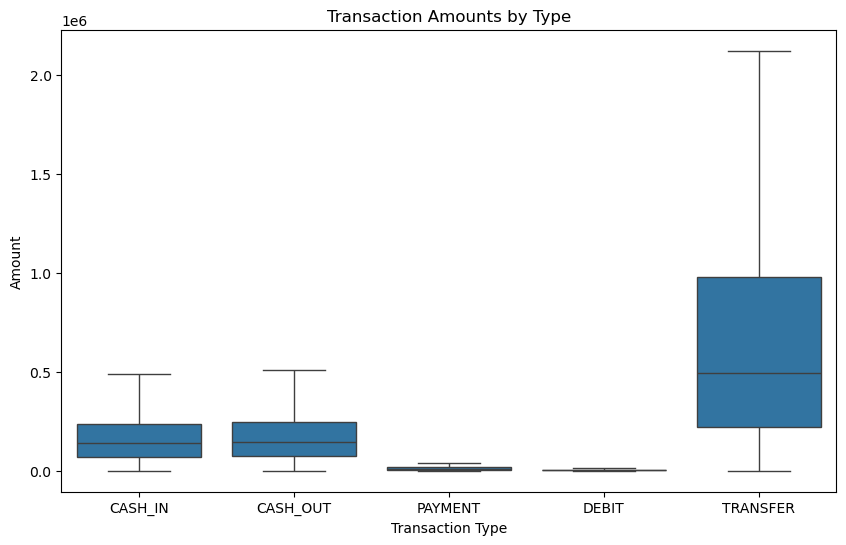

In [59]:
# 3, boxplot of 'amount' by 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df_sample, showfliers=False)
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

## Observations From Summary Statistics and Boxplot Graph

**TRANSFER dominates:**
  - Highest mean ($900K) and median ($500K) transaction amounts.
  - Extreme outliers pushing max values above $60M.

**CASH_OUT is large but less extreme:**
  - Mean ($176K) and median ($146K) much lower than TRANSFER.
  - However, max transaction reaches $10M.
- CASH_IN is similar to CASH_OUT in scale.
- DEBIT and PAYMENT involve significantly smaller amounts:
- Typical transactions stay under ~$20K.

**Notes:**
- Transfers likely drive fraud risk due to their scale.
- High-value CASH_OUT transactions could also be targeted.
- PAYMENT and DEBIT are lower risk but might hide fraudulent micro-transactions.



## Bivariate Analysis

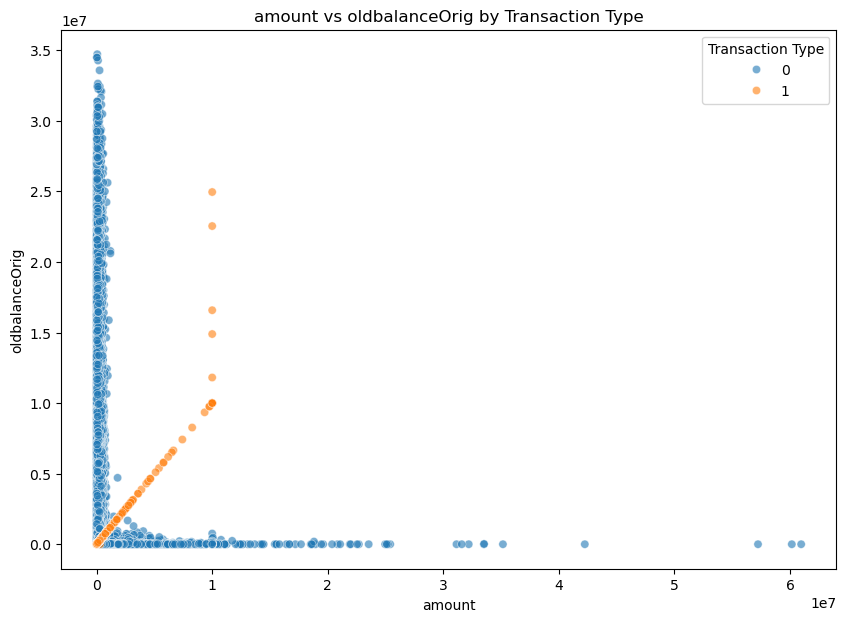

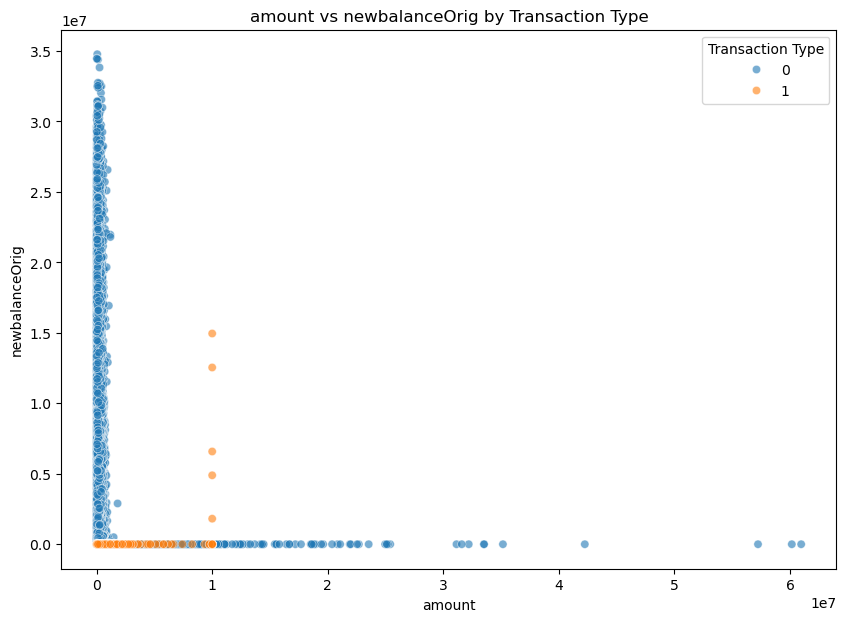

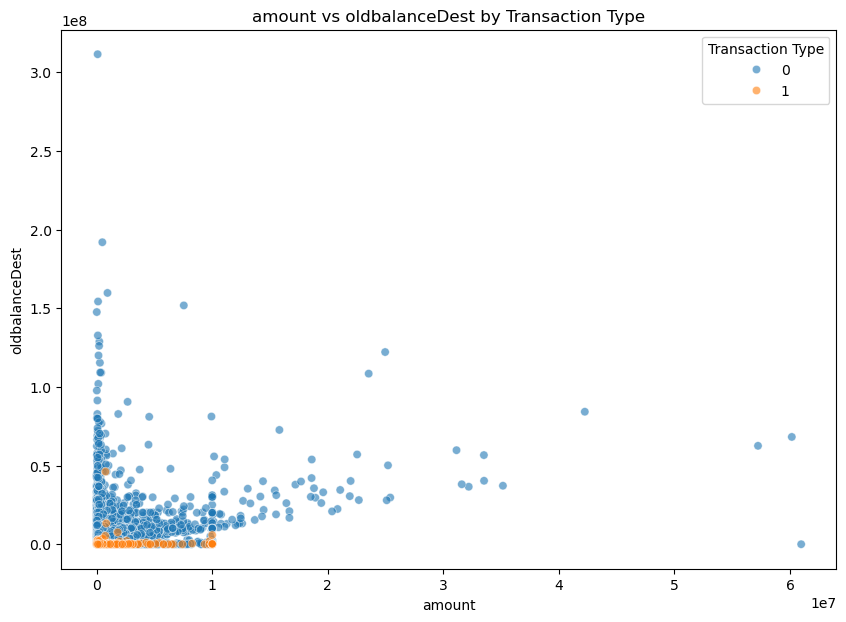

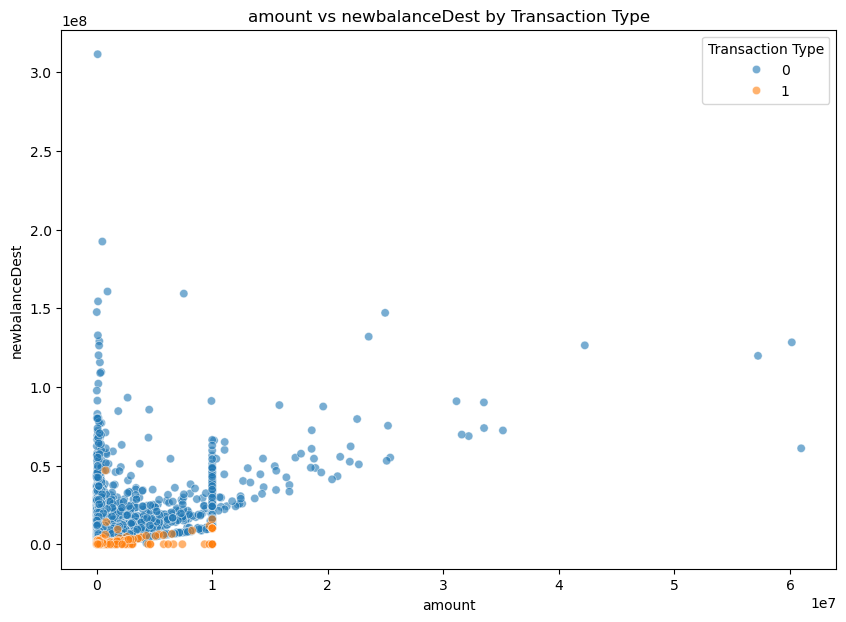

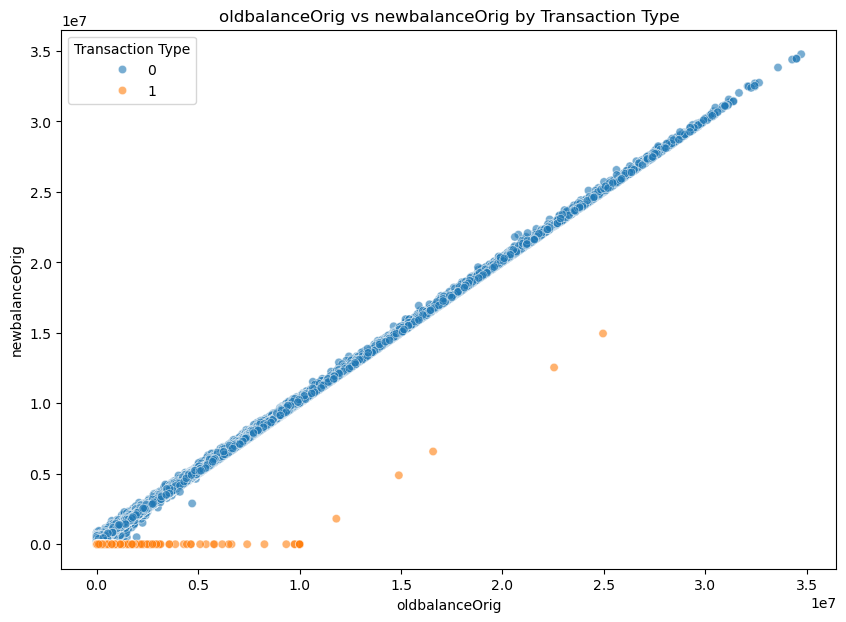

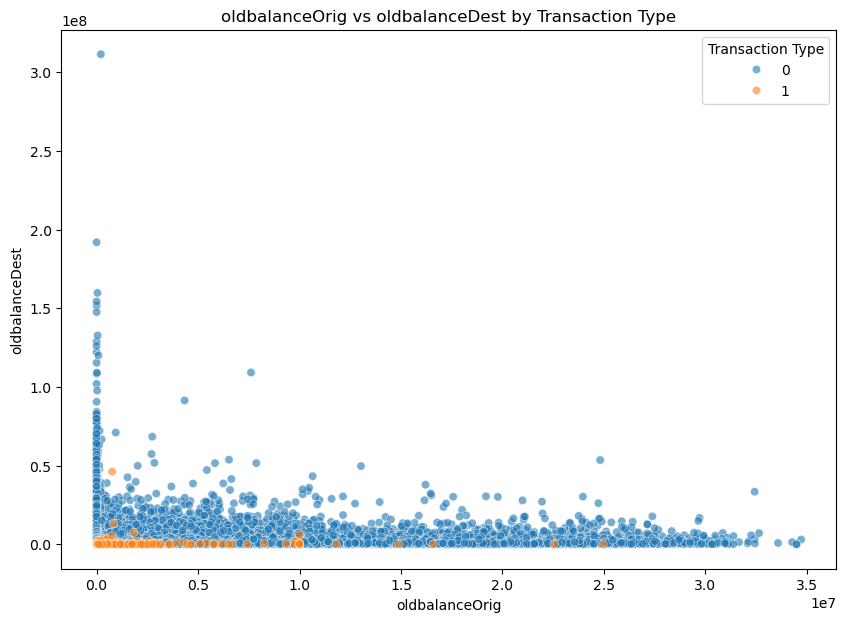

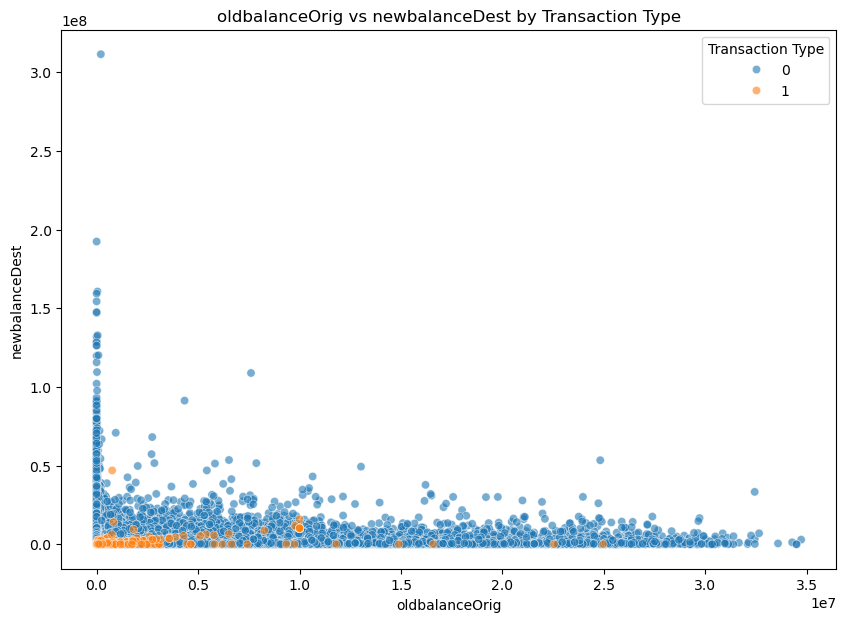

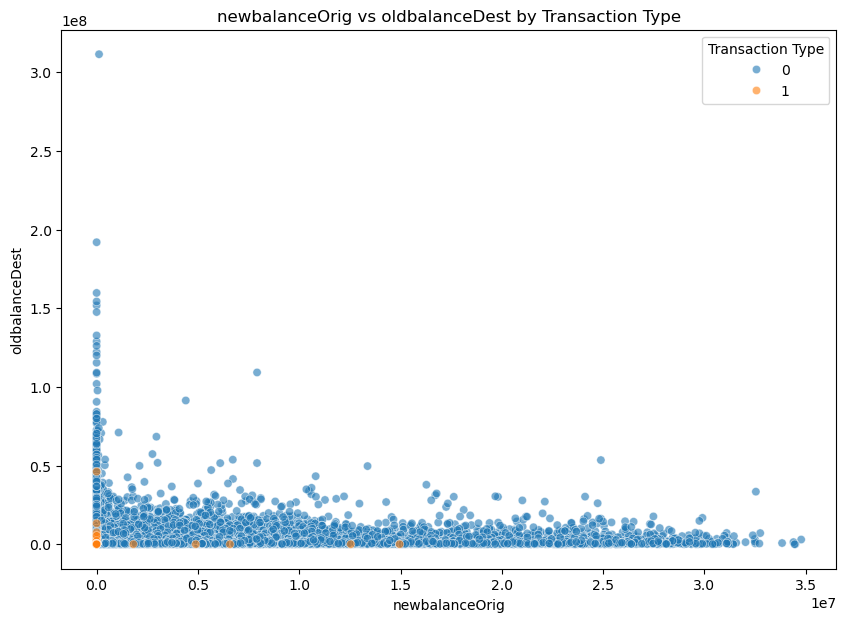

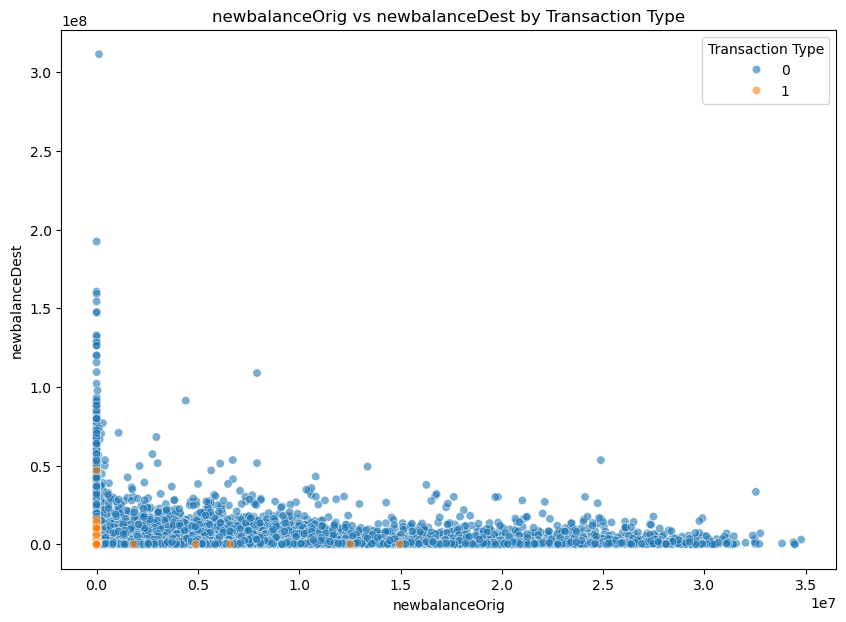

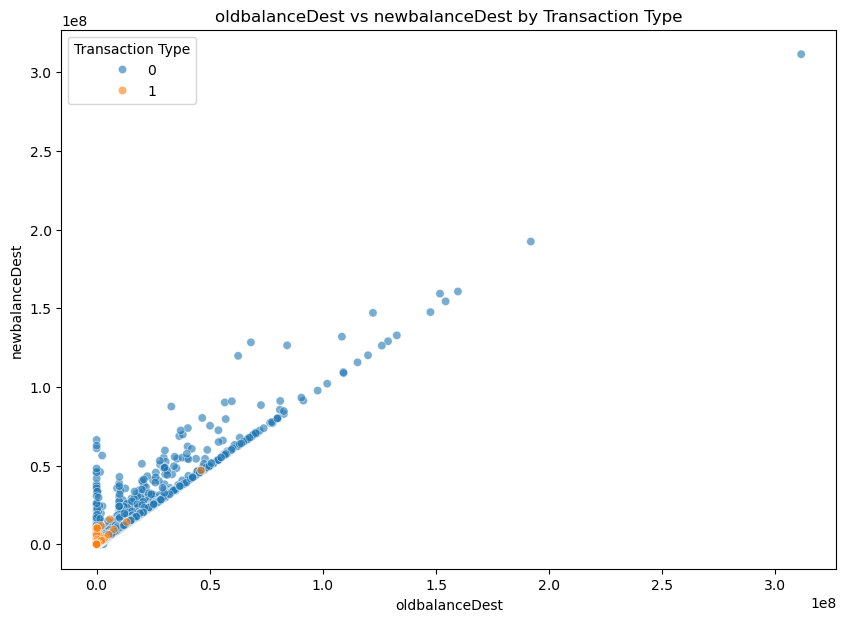

In [ ]:
# 2, Pairwise scatter plots with Type as hue
num_cols = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            data=df_sample, 
            x=num_cols[i], 
            y=num_cols[j], 
            hue='isFraud',
            alpha=0.6,
            palette='tab10'
            
        )
        plt.title(f"{num_cols[i]} vs {num_cols[j]} by Transaction Type")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.legend(title='Transaction Type')
        plt.show()


## Observations From comparing Features Using Scatter Plot Visualizations:

**Fraud Seems Clustered Around Certain Amounts:**
- In amount vs oldbalanceOrg and amount vs newbalanceOrig, most fraud points are concentrated along the X-axis near 0 balances.
- This suggests fraudulent transactions often occur when the origin account has very low or 0 balances—possibly drained accounts.

**Highly Suspect Large Transactions:**
- amount vs oldbalanceDest
- amount vs newbalanceDest
- Fraud points are more frequent among large transaction amounts.
- This supports earlier finding that TRANSFER and CASH_OUT have larger amounts and fraud association.

**Fraud Appears as Outliers in Balance Changes:**
- oldbalanceDest vs newbalanceDest
- oldbalanceOrg vs newbalanceOrig
- Fraud points often deviate from the linear relationships of legitimate transactions.
- Legitimate transactions follow a clean diagonal--balances change proportionally.
- Fraud shows as “scattered” anomalies...

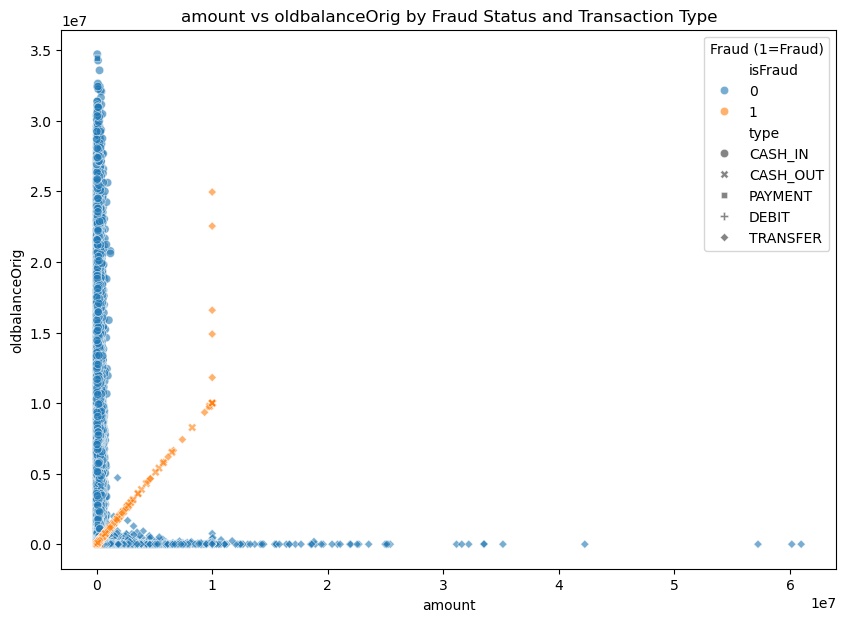

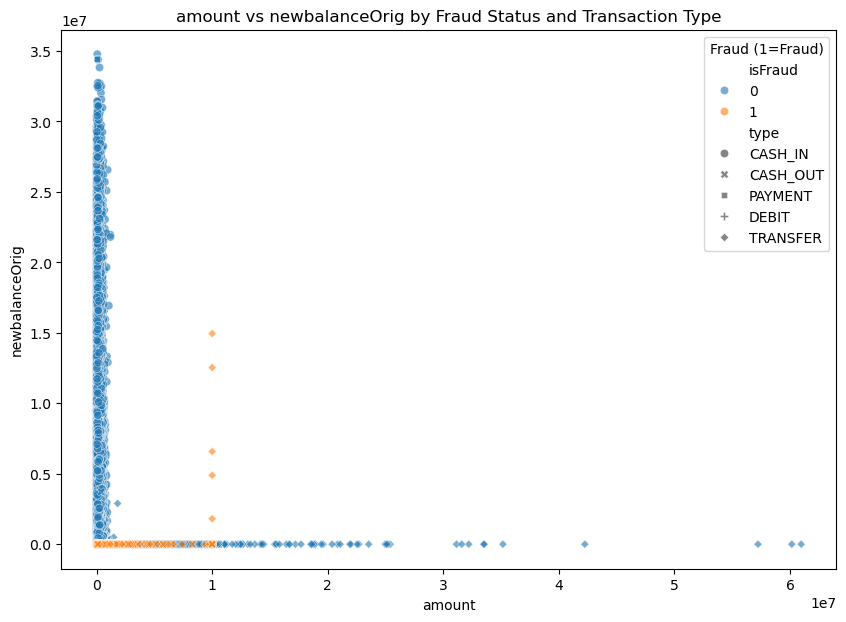

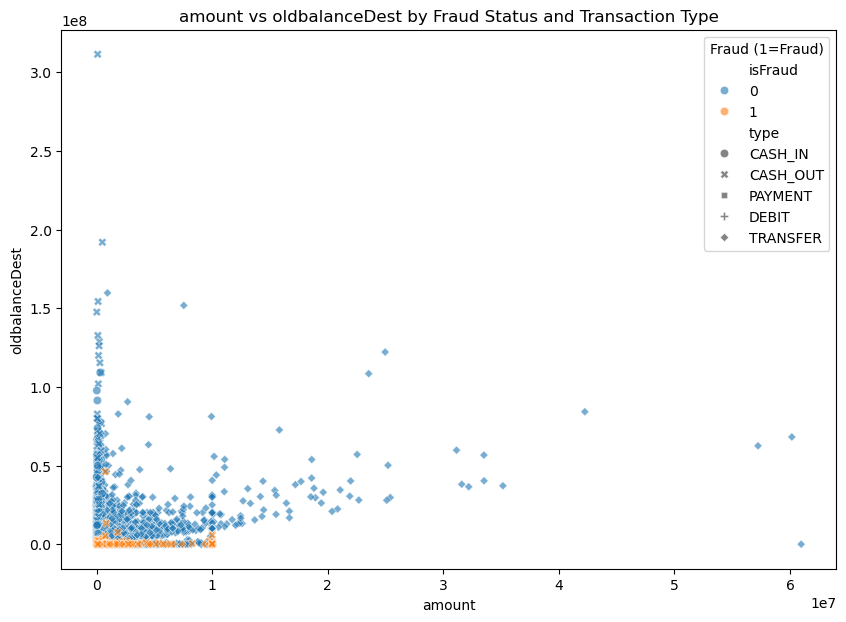

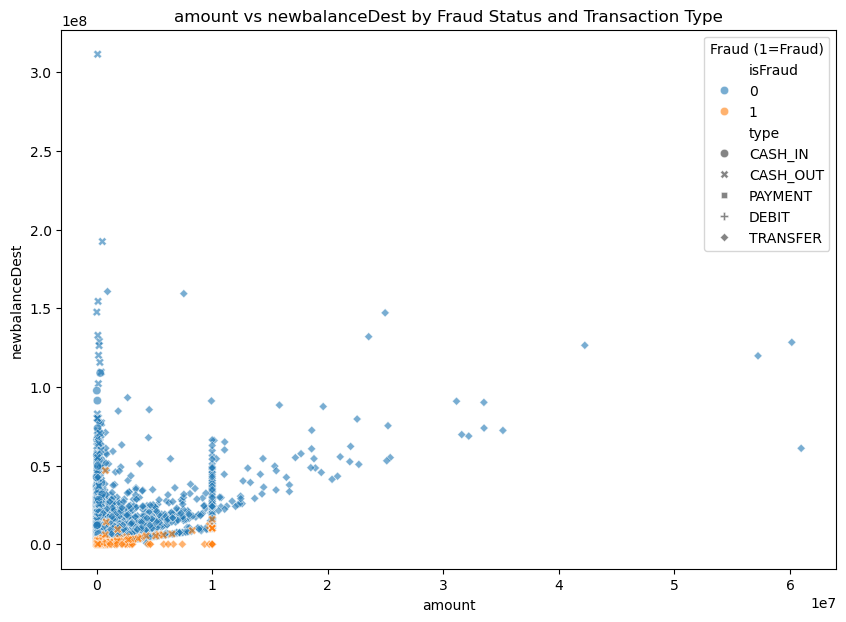

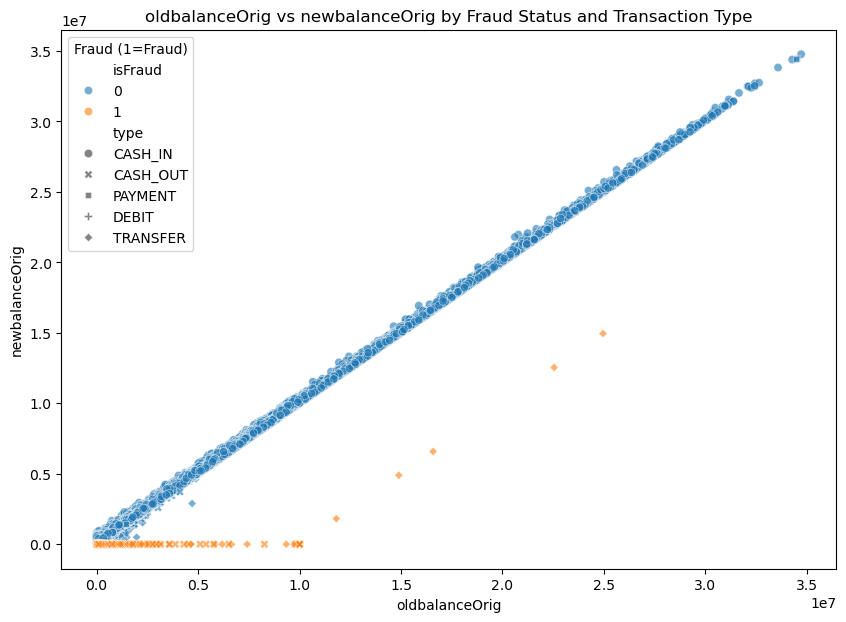

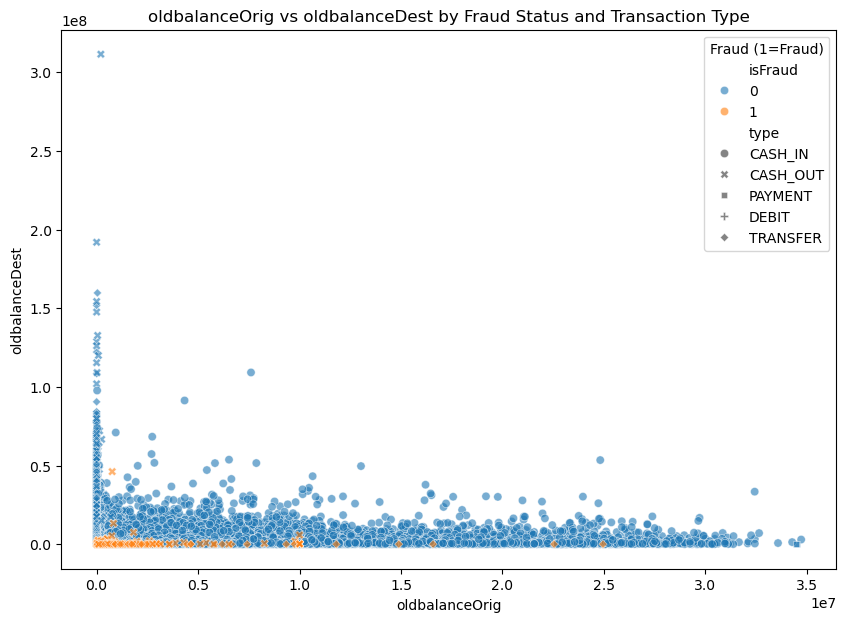

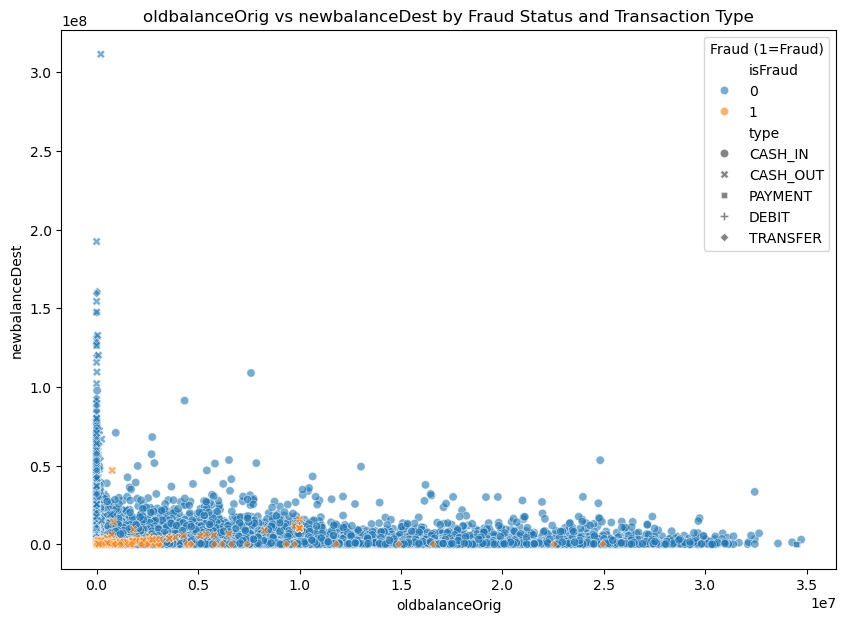

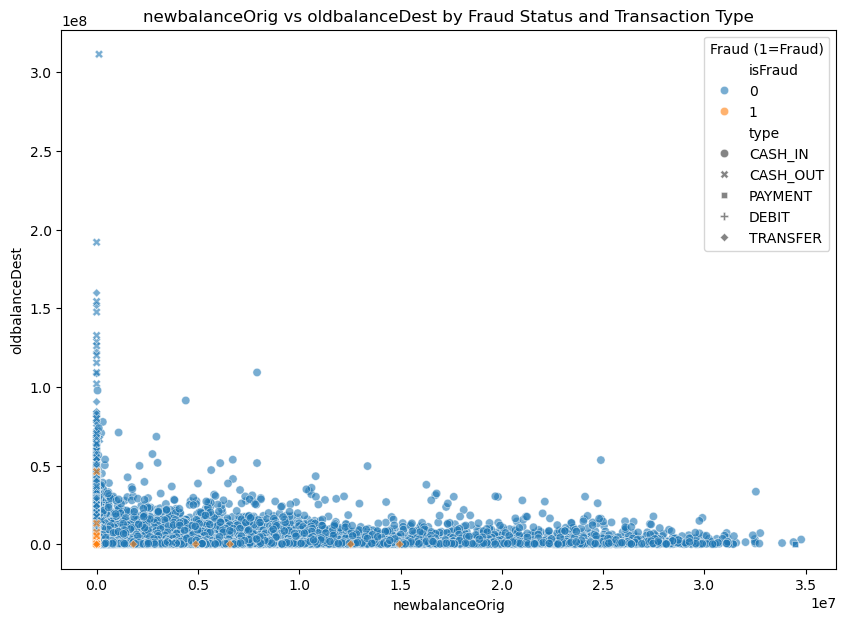

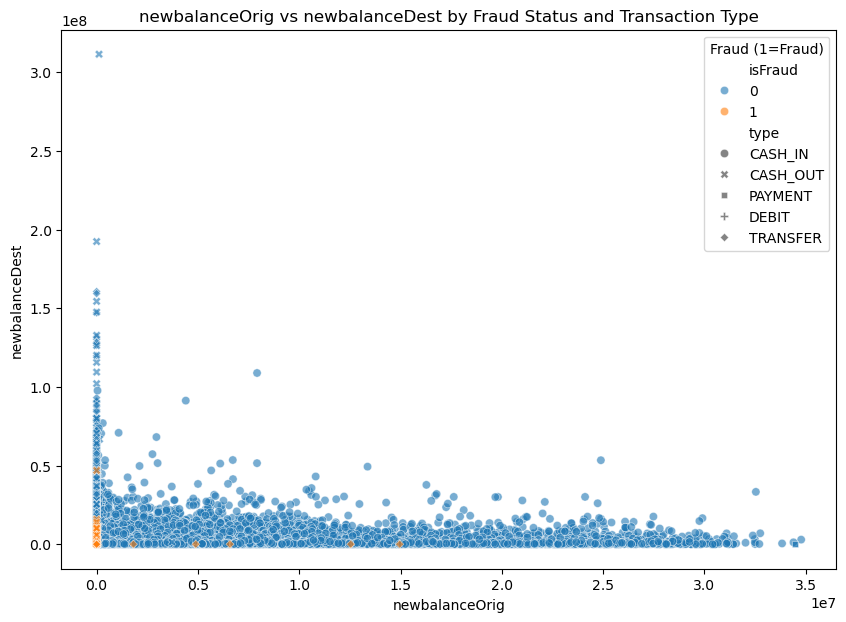

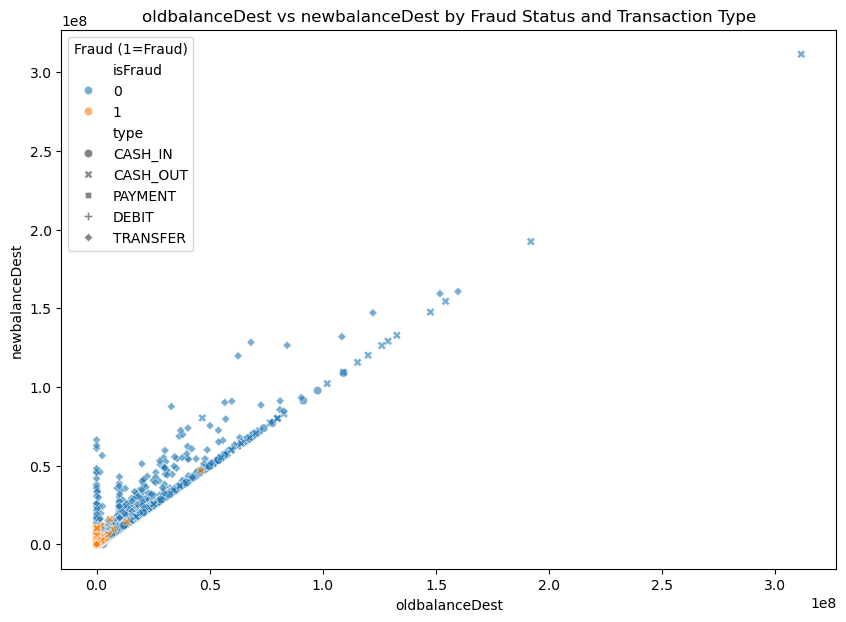

In [33]:
# 4, Pairwise scatter plots with 'type' as hue
num_cols = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Pairwise scatter plots with style as 'type' and 'isFraud' as hue
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            data=df_sample,
            x=num_cols[i], 
            y=num_cols[j], 
            hue='isFraud',          # Highlight fraud vs non-fraud
            style='type',           # Show transaction type as marker style
            alpha=0.6,
            palette='tab10'
        )
        # Plot labeling
        plt.title(f"{num_cols[i]} vs {num_cols[j]} by Fraud Status and Transaction Type")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.legend(title='Fraud (1=Fraud)')
        plt.show()


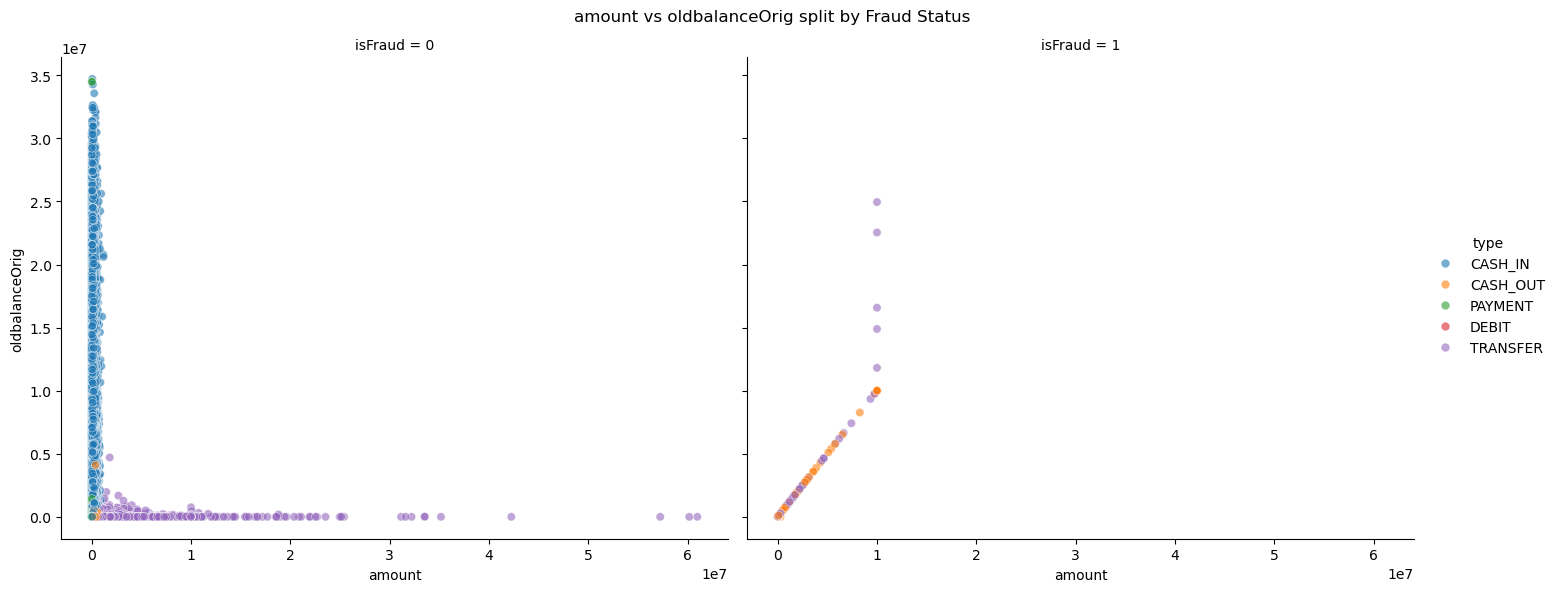

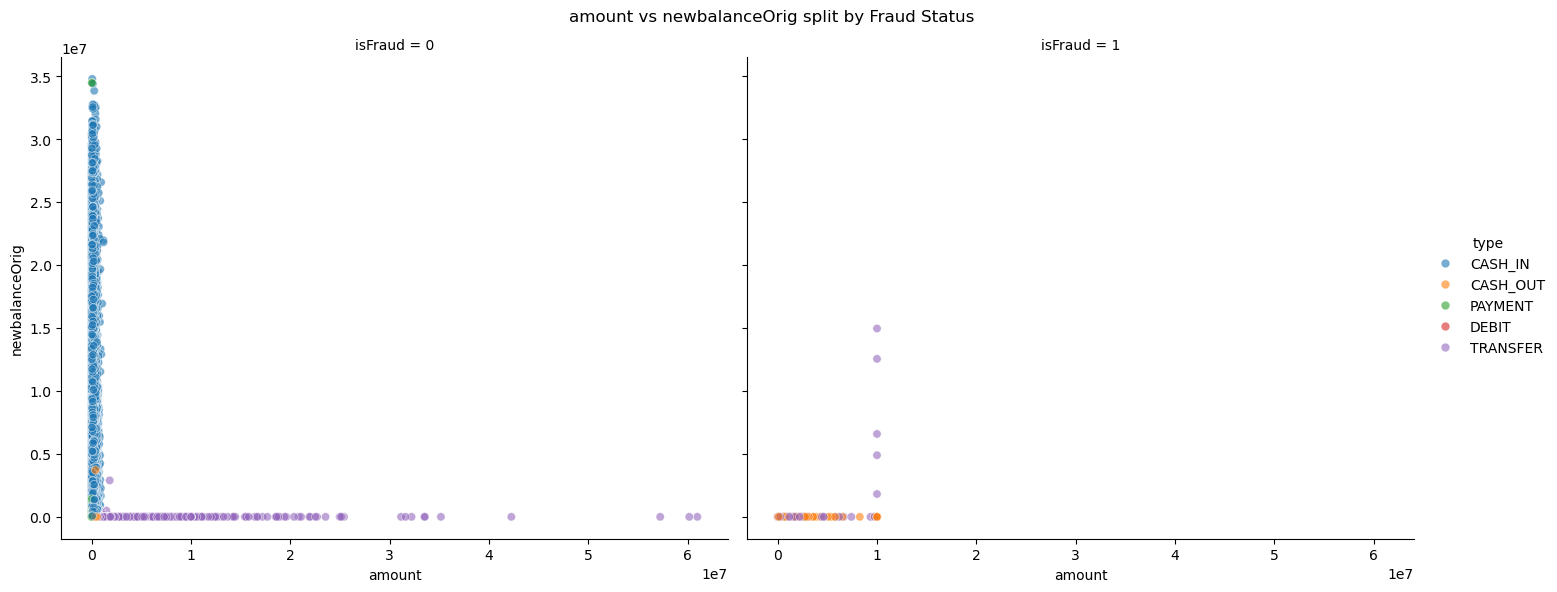

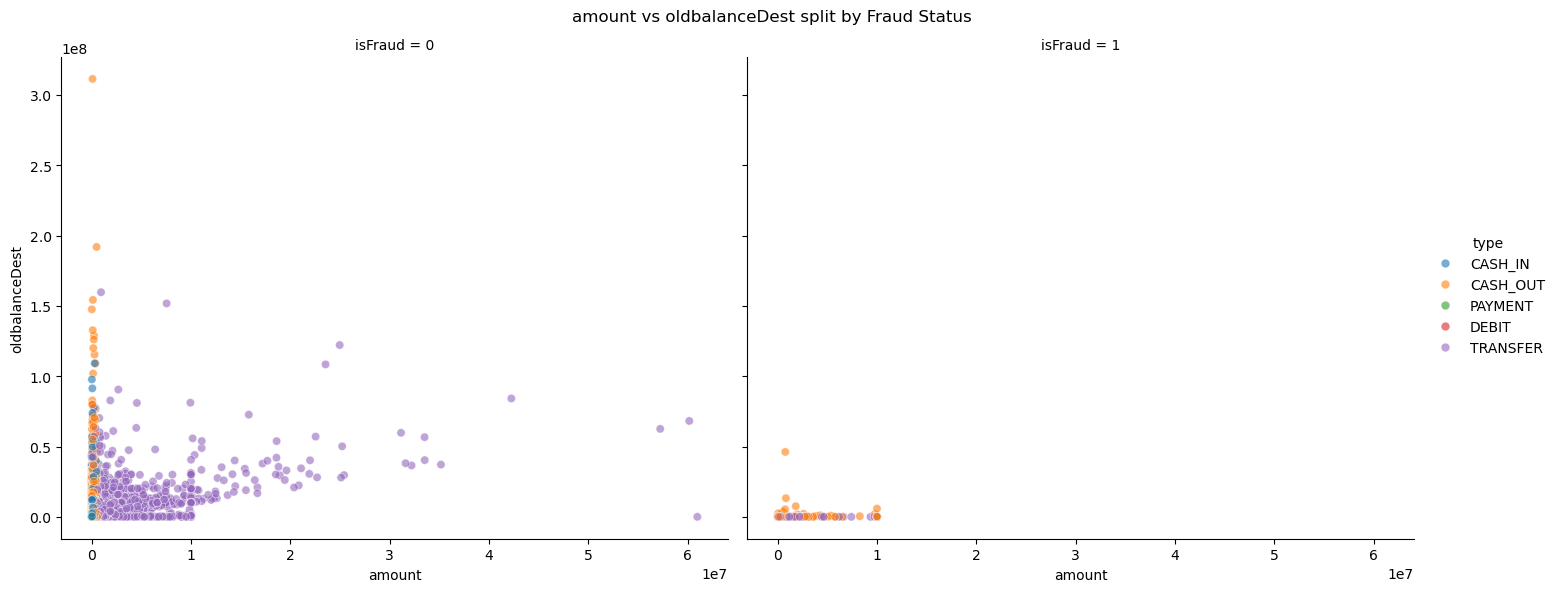

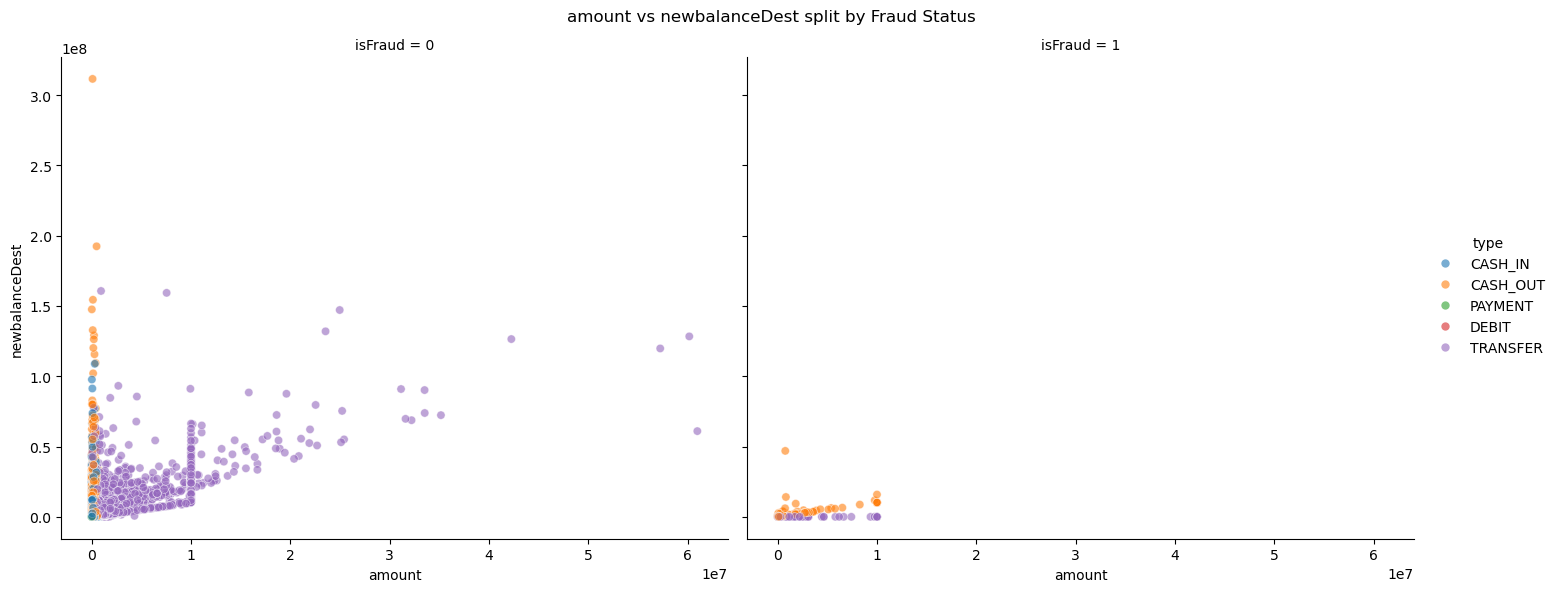

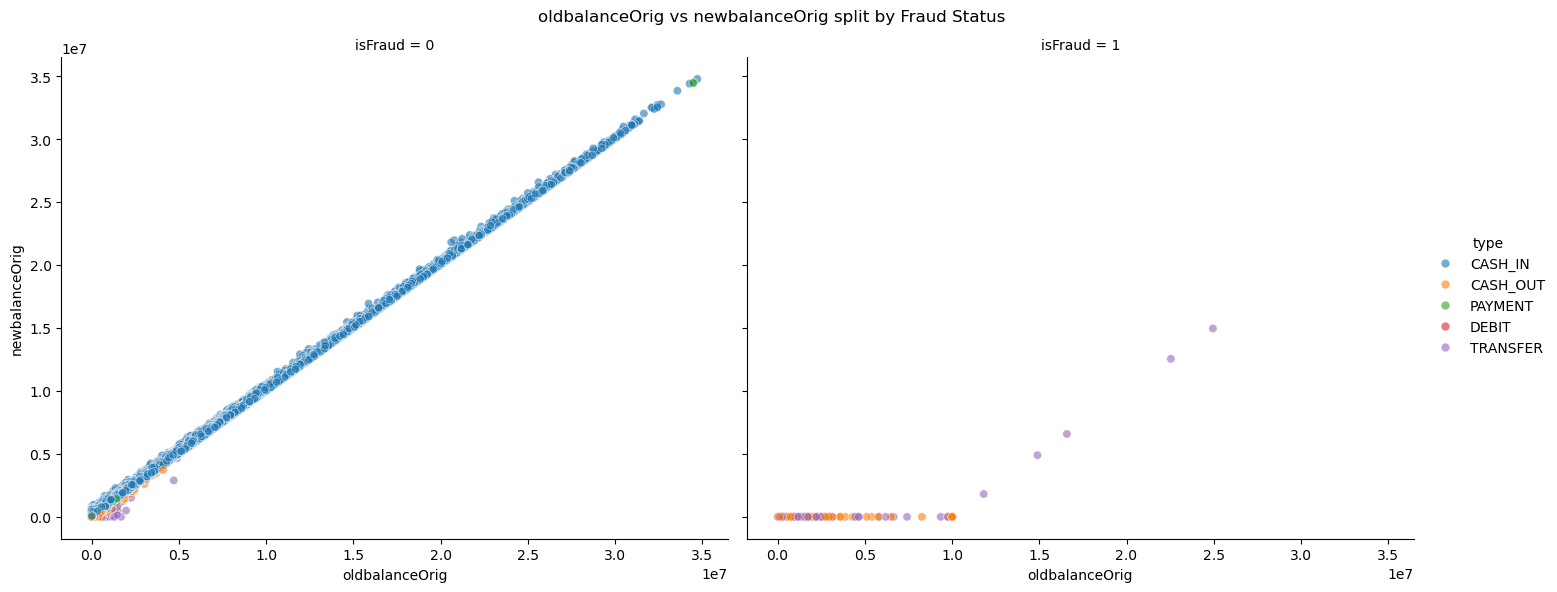

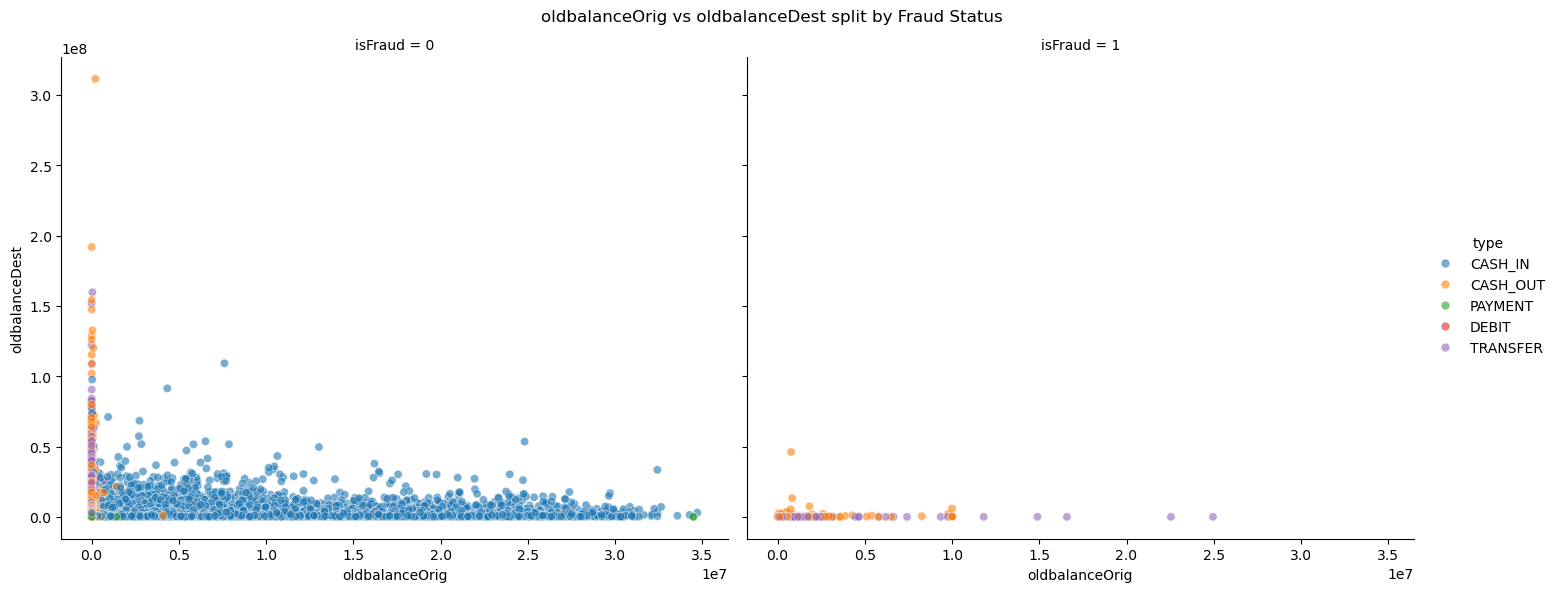

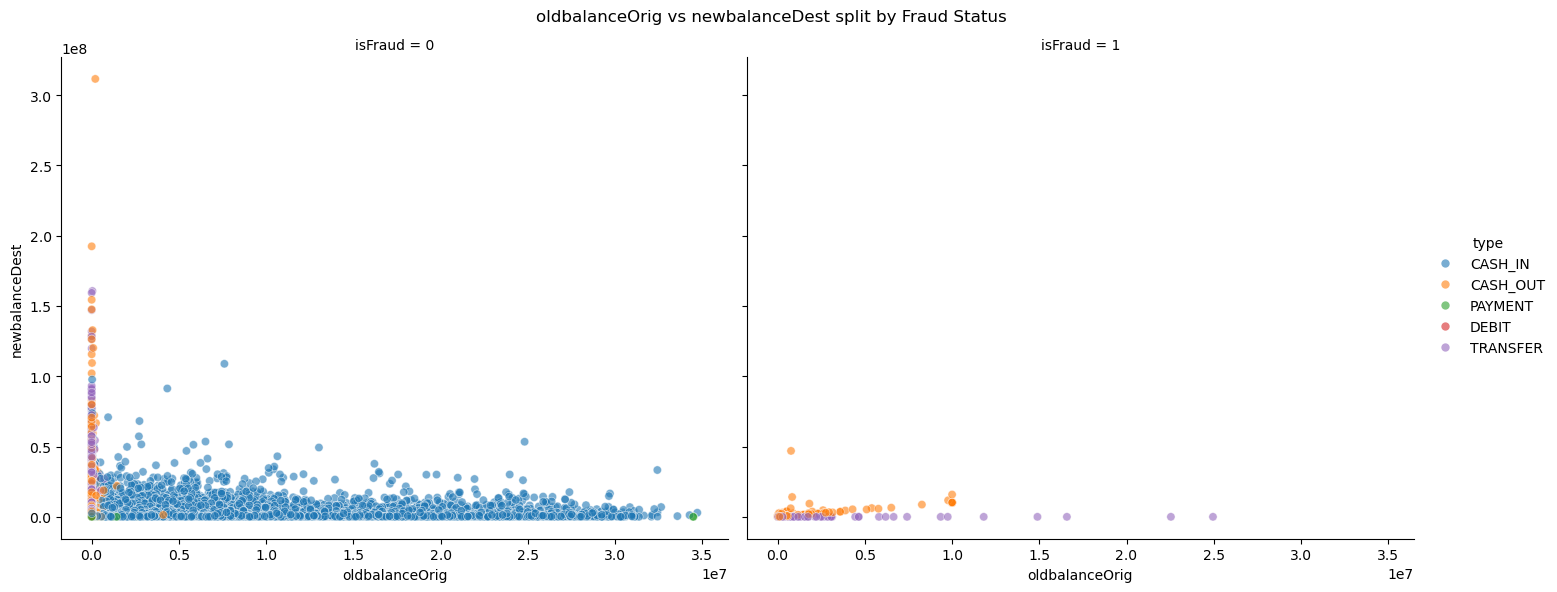

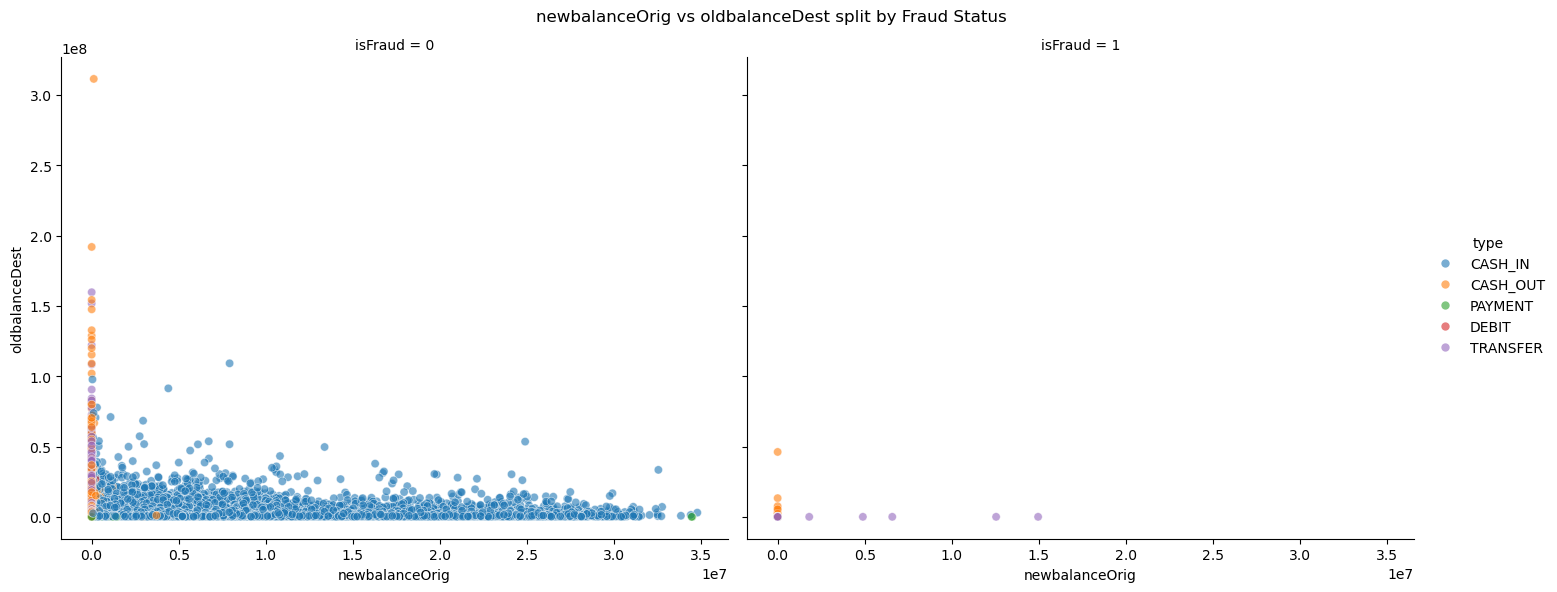

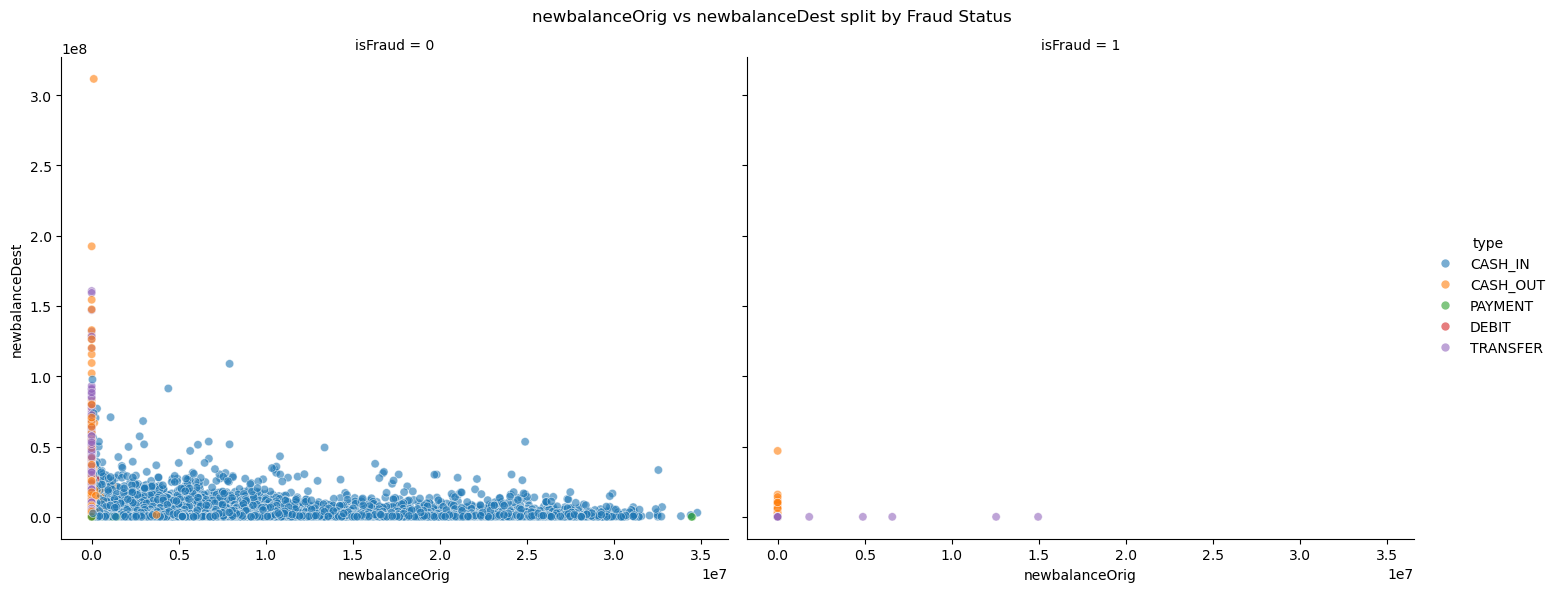

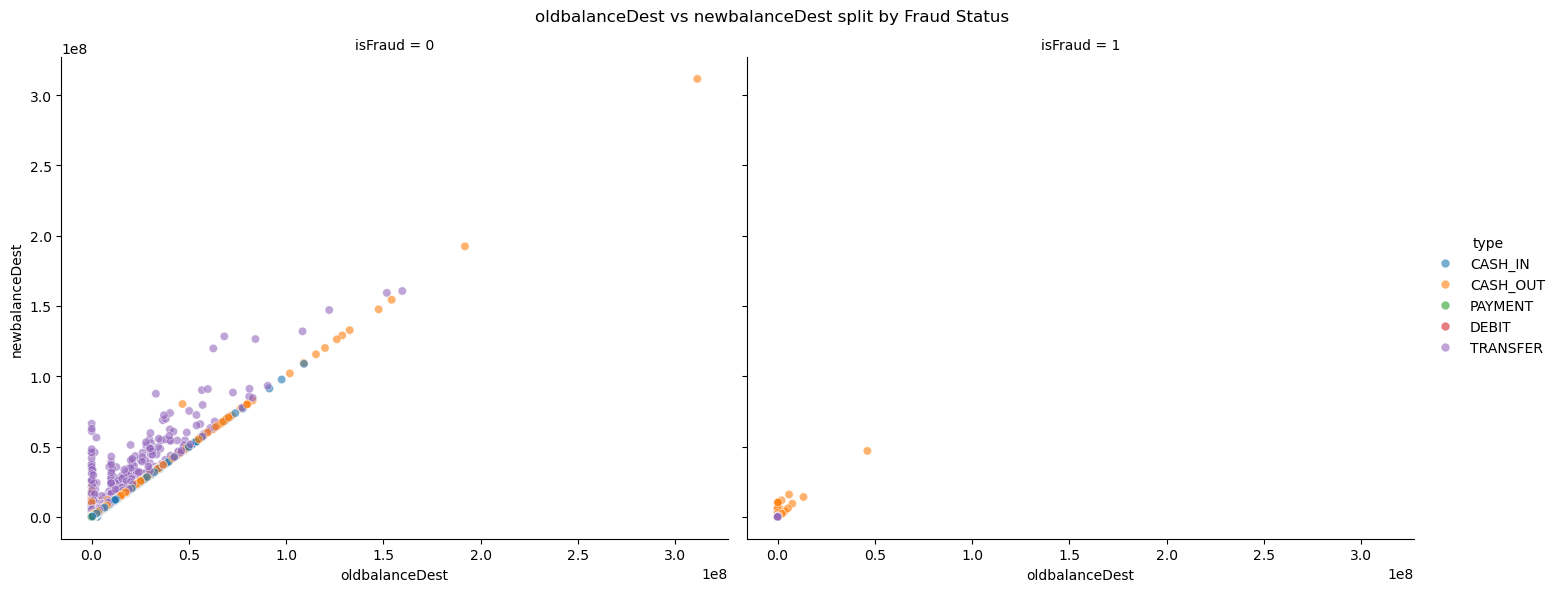

In [ ]:
# 4, Pariwise scatter plots split by Fruad Status with 'type' as hue and 'isFraud' as col
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        sns.relplot(
            data=df_sample,
            x=num_cols[i],
            y=num_cols[j],
            hue='type',
            col='isFraud',
            kind='scatter',
            height=6,
            aspect=1.2,
            alpha=0.6,
            palette='tab10'
        )
        # Plot labeling
        plt.subplots_adjust(top=0.9)
        plt.suptitle(f"{num_cols[i]} vs {num_cols[j]} split by Fraud Status")
        plt.show()


## Observations from Scatter Plot of Comparing amounts and accross transaction types?

- Fraudulent transactions--isFraud=1--are concentrated in **TRANSFER** and **CASH_OUT** types.  
- These transaction types tend to involve **larger amounts**, visible as outliers in scatter plots.
- Legitimate transactions are more evenly distributed across all types.

**Notes** 
- Large-value transfers and cash-outs are disproportionately associated with fraud, whereas small routine transactions (PAYMENT, CASH_IN) rarely exhibit fraudulent behavior.


In [55]:
# 5, Confustion matrix of isflaggedfraud vs isfraud columns
# Confusion matrix table
confusion = pd.crosstab(
    df_sample['isFraud'], 
    df_sample['isFlaggedFraud'], 
    rownames=['Actual Fraud'], 
    colnames=['Flagged Fraud']
)

print(tabulate(confusion, headers='keys', tablefmt='fancy_grid'))

# print confusion matrix
TP = confusion.at[1, 1] if 1 in confusion.columns else 0
FP = confusion.at[0, 1] if 1 in confusion.columns else 0
FN = confusion.at[1, 0] if 0 in confusion.columns else 0
TN = confusion.at[0, 0] if 0 in confusion.columns else 0

print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

╒════════════════╤════════╕
│   Actual Fraud │      0 │
╞════════════════╪════════╡
│              0 │ 199741 │
├────────────────┼────────┤
│              1 │    259 │
╘════════════════╧════════╛
TP: 0, FP: 0, FN: 259, TN: 199741


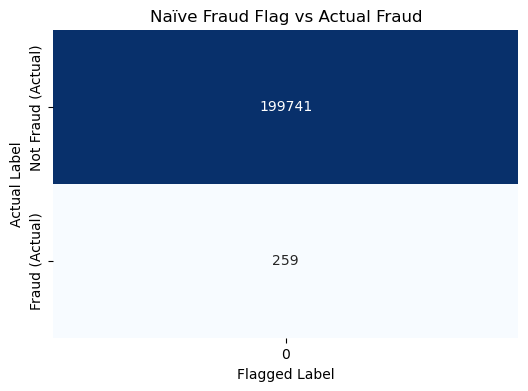

In [52]:
# Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Naïve Fraud Flag vs Actual Fraud")
plt.ylabel("Actual Label")
plt.xlabel("Flagged Label")
plt.show()


## Observations from Tabulate, Confustion Matrix, and Heatmap

**According to tabulate, confusiton matrix, and heatmap:**
- The built-in fraud flag (`isFlaggedFraud`) rarely triggers--only 1 out of 1,000,000 transactions were flagged, and   
As a result:
  - Precision and recall metrics are nearly 0
  - The system fails to detect the vast majority of fraud cases
  - The system used to indentify frauds was a naive model that only flaggs transactions > $200,000 (not in USD) as fraud.
  - This highlights the ineffective nature of this model.  


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

According to the Histogram Plots, most transactions involve small amounts 
- This show small balance changes likely involving low-amount purchases, payments, and general day-to-day transactions/activities. 
- amounts seem to be concentrated between 0 - 1
- There is also a heavily concentrated between 0 - 0.5 for oldbalanceDest and newbalannceDest
- oldbalanceOrig and newbalanceOrig appear to be concentrated between 0 - 2.5

**Rare/possbile fraudulent transactions Transactions:**
- These transactions/amounts involve pretty large outliers
- Causing dramatic balance shifts
- These are likely to include fraudulent activities

**Summary:**
- The data has heavy-tailed distributions--many small values, few extreme ones.
- Fraud may often be associated with these rare large transactions.
- Models need transformation (log scaling) or feature engineering to handle this skewness properly...

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

- According to Scatter Plot Visualizations fraud Seems clustered around certain amounts
  - In amount vs oldbalanceOrg and amount vs newbalanceOrig. Most fraud points are concentrated along the X-axis near 0 balances.
  - This suggests fraudulent transactions often occur when the origin account has very low or 0 balances-—possibly drained accounts.

- There are highly suspect large transactions in amount vs oldbalanceDest and amount vs newbalanceDest
  - Fraud points are more frequent among large transaction amounts.
  - This supports earlier finding that TRANSFER and CASH_OUT have larger amounts and fraud association.

- Additionally, fraud appears as Outliers in balance changes:
  - oldbalanceDest vs newbalanceDest
  - oldbalanceOrg vs newbalanceOrig


### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

According to Summary Statistics and Boxplot Graph shows that TRANSFER dominates transactions type and amount
  - Highest mean ($900K) and median ($500K) transaction amounts.
  - Extreme outliers pushing max values above $60M.

CASH_OUT is large but less extreme, with Mean ($176K) and median ($146K) much lower than TRANSFER. However, max transaction reaches $10M.
  - CASH_IN is similar to CASH_OUT in scale.
  - DEBIT and PAYMENT involve significantly smaller amounts:
  - Typical transactions stay under ~$20K.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

- According to Scatter Plots, fraudulent transactions are concentrated in 'TRANSFER' and 'CASH_OUT' types.  
  - These transaction types tend to involve larger amounts, visible as outliers in scatter plots.
  - Legitimate transactions are more evenly distributed across all types.

Observed Pattern: 
- Large-value transfers and cash-outs are disproportionately associated with fraud, whereas small routine transactions (PAYMENT, CASH_IN) rarely exhibit fraudulent behavior.


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

According to the table, confusiton matrix, and heatmap:
- The built-in fraud flag (`isFlaggedFraud`) rarely triggers--only 1 out of 1,000,000 transactions were flagged, and   
As a result:
  - Precision and recall metrics are nearly 0
  - The system fails to detect the vast majority of fraud cases
  - The system used to indentify frauds was a naive model that only flaggs transactions > $200,000 (not in USD) as fraud.
  - This highlights the ineffective nature of this model and thereby justifying another approach.
